In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
 
import seaborn as sns
import json
import pandas as pd

import matplotlib

from IPython.core.debugger import Tracer

In [2]:
def make_dataframe(filename, trial_id, stride = 1, stop_point=1.0, moving_avg=None):
    with open(filename) as jfile:
        dat = json.load(jfile)
        
    for i in range(len(dat)):
        dat[i] = [trial_id] + dat[i]
        
    stop_point = int(stop_point * len(dat))
    #import ipdb; ipdb.set_trace()
    dat = dat[:stop_point:stride]
    df = pd.DataFrame(dat, columns=['trial_id','wall_time', 'step', 'value'])
    if moving_avg is not None:
        df['value'] = df['value'].rolling(window=moving_avg, win_type='triang').mean()
    return df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/conda/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


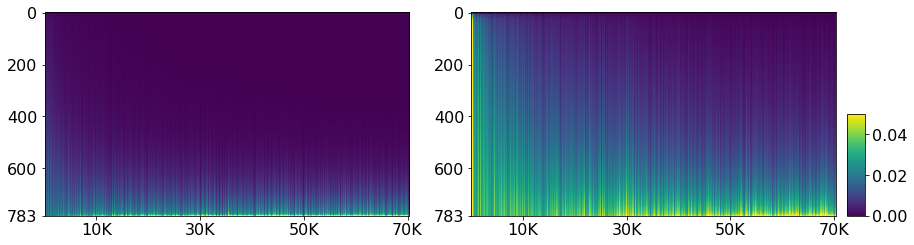

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


mat_rnn = np.load('result4plot_final/dtriv_mu_0.900000_epsilon_0.100000_dldh.npy')
mat_mrnn = np.load('result4plot_final/mdtriv_mu_0.999000_epsilon_0.600000_dldh.npy')
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(12,20))
# fig, ax1, ax2 = plt.subplots(ncols=2, figsize=(6,10))
pic = axes[1].imshow(mat_mrnn, extent=[0,mat_mrnn.shape[1],0,784], aspect='equal', vmin=0, vmax=0.05)
xticks = [200, 600, 1000, 1400]
xticklabels = ['10K', '30K', '50K', '70K']
yticks = [0, 183, 383, 583, 783]
yticklabels = ['783','600', '400', '200', '0']
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels)
axes[1].set_yticks(yticks)
axes[1].set_yticklabels(yticklabels)
axes[1].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='minor', labelsize=16)

pic = axes[0].imshow(mat_rnn, extent=[0,mat_rnn.shape[1],0,784], aspect='equal', vmin=0, vmax=0.05)
xticks = [200, 600, 1000, 1400]
xticklabels = ['10K', '30K', '50K', '70K']
plt.setp(axes[0], xticks=xticks, xticklabels=xticklabels)
yticks = [0, 183, 383, 583, 783]
yticklabels = ['783','600', '400', '200', '0']
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticklabels)
axes[0].set_yticks(yticks)
axes[0].set_yticklabels(yticklabels)
axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[0].tick_params(axis='both', which='minor', labelsize=16)
axins = inset_axes(axes[0],
                   width="5%",  # width = 5% of parent_bbox width
                   height="50%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(2.2, 0., 1, 1),
                   bbox_transform=axes[0].transAxes,
                   borderpad=0,
                   )
cbar = fig.colorbar(pic, ax=axes.ravel().tolist(), shrink=0.12, cax=axins)
cbar.ax.tick_params(labelsize=16)
fig.savefig('figures/stability.pdf')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


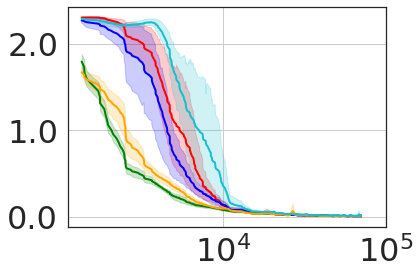

In [4]:
###############################################################
#### Figure 3 MNIST Train Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_mnist_n256.pdf'

keys = ['run0','run1','run2','run3','run4']

stop_point=1.0

#srsgd
lstm = ['./result4plot_final/run-lstm-mnist-seed-0_train_loss_lstm-tag-train_loss.json',
        './result4plot_final/run-lstm-mnist-seed-1_train_loss_lstm-tag-train_loss.json',
        './result4plot_final/run-lstm-mnist-seed-2_train_loss_lstm-tag-train_loss.json',
        './result4plot_final/run-lstm-mnist-seed-3_train_loss_lstm-tag-train_loss.json',
        './result4plot_final/run-lstm-mnist-seed-4_train_loss_lstm-tag-train_loss.json',]
id1 = 'LSTM'

mlstm = ['./result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-0_train_loss_mlstm-tag-train_loss.json',
      './result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-1_train_loss_mlstm-tag-train_loss.json',
      './result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-2_train_loss_mlstm-tag-train_loss.json',
      './result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-3_train_loss_mlstm-tag-train_loss.json',
      './result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-4_train_loss_mlstm-tag-train_loss.json',]
id2 = 'MomentumLSTM'

alstm = ['./result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-0_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-1_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-2_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-3_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-4_train_loss_alstm-tag-train_loss.json',]
id3 = 'AdamLSTM'

rlstm = ['./result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-0_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-1_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-2_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-3_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-4_train_loss_alstm-tag-train_loss.json',]
id4 = 'RMSPropLSTM'

nlstm = ['./result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-0_train_loss_nlstm-tag-train_loss.json',
      './result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-1_train_loss_nlstm-tag-train_loss.json',
      './result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-2_train_loss_nlstm-tag-train_loss.json',
      './result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-3_train_loss_nlstm-tag-train_loss.json',
      './result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-4_train_loss_nlstm-tag-train_loss.json',]
id5 = 'SRLSTM'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point, moving_avg=30))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(lstm, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mlstm, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)
sns_plot, _ = plot_line(alstm, keys, id3, stride=1, stop_point=stop_point, color='green', linewidth=2)
sns_plot, _ = plot_line(rlstm, keys, id4, stride=1, stop_point=stop_point, color='orange', linewidth=2)
sns_plot, _ = plot_line(nlstm, keys, id5, stride=1, stop_point=stop_point, color='tab:cyan', linewidth=2)


sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(xscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
# sns_plot.set_xlim(left=0)
# sns_plot.set_ylim(top=2.5, bottom=-0.01)
yticks = [0, 1, 2]
yticklabels = ['0.0', '1.0', '2.0']
plt.setp(sns_plot, yticks=yticks, yticklabels=yticklabels)
xticks = [1e4, 1e5]
xticklabels = [r'$10^{4}$', r'$10^{5}$']
plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


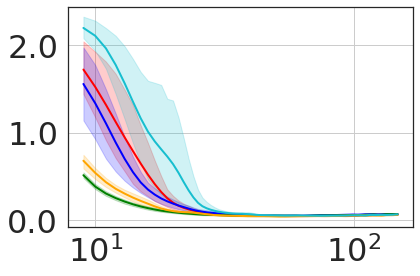

In [5]:
###############################################################
#### Figure 3 MNIST Test Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'test_loss_mnist_n256.pdf'

keys = ['run0','run1','run2','run3','run4']

stop_point=1.0

#srsgd
lstm = ['./result4plot_final/run-lstm-mnist-seed-0_test_loss_lstm-tag-test_loss.json',
        './result4plot_final/run-lstm-mnist-seed-1_test_loss_lstm-tag-test_loss.json',
        './result4plot_final/run-lstm-mnist-seed-2_test_loss_lstm-tag-test_loss.json',
        './result4plot_final/run-lstm-mnist-seed-3_test_loss_lstm-tag-test_loss.json',
        './result4plot_final/run-lstm-mnist-seed-4_test_loss_lstm-tag-test_loss.json',]
id1 = 'LSTM'

mlstm = ['./result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-0_test_loss_mlstm-tag-test_loss.json',
      './result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-1_test_loss_mlstm-tag-test_loss.json',
      './result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-2_test_loss_mlstm-tag-test_loss.json',
      './result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-3_test_loss_mlstm-tag-test_loss.json',
      './result4plot_final/run-mlstm-mnist-mu-0.6-epsilon-0.6-seed-4_test_loss_mlstm-tag-test_loss.json',]
id2 = 'MomentumLSTM'

alstm = ['./result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-0_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-1_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-2_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-3_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-alstm-mnist-mu-0.6-epsilon-0.6-mus-0.1-seed-4_test_loss_alstm-tag-test_loss.json',]
id3 = 'AdamLSTM'

rlstm = ['./result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-0_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-1_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-2_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-3_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-rlstm-mnist-mu-0.0-epsilon-0.6-mus-0.9-seed-4_test_loss_alstm-tag-test_loss.json',]
id4 = 'RMSPropLSTM'

nlstm = ['./result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-0_test_loss_nlstm-tag-test_loss.json',
      './result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-1_test_loss_nlstm-tag-test_loss.json',
      './result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-2_test_loss_nlstm-tag-test_loss.json',
      './result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-3_test_loss_nlstm-tag-test_loss.json',
      './result4plot_final/run-nlstm-mnist-epsilon-1.0-rs-2-seed-4_test_loss_nlstm-tag-test_loss.json',]
id5 = 'SRLSTM'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point, moving_avg=10))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(lstm, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mlstm, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)
sns_plot, _ = plot_line(alstm, keys, id3, stride=1, stop_point=stop_point, color='green', linewidth=2)
sns_plot, _ = plot_line(rlstm, keys, id4, stride=1, stop_point=stop_point, color='orange', linewidth=2)
sns_plot, _ = plot_line(nlstm, keys, id5, stride=1, stop_point=stop_point, color='tab:cyan', linewidth=2)


sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(xscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
yticks = [0, 1, 2]
yticklabels = ['0.0', '1.0', '2.0']
plt.setp(sns_plot, yticks=yticks, yticklabels=yticklabels)
# sns_plot.set_xlim(left=0)
# sns_plot.set_ylim(top=2.5, bottom=-0.01)
# xticks = [2000, 4000, 6000, 8000, 10000, 12000, 14000]
# xticklabels = ['2K', '4K', '6K', '8K', '10K', '12K', '14K']
# plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


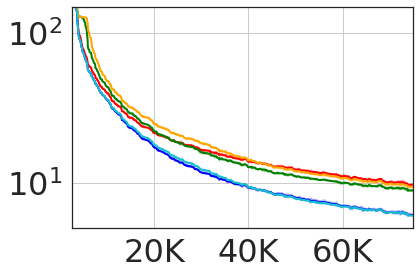

In [6]:
###############################################################
#### Figure 3 TIMIT Train Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_timit_n158.pdf'

keys = ['run0','run1','run2','run3','run4']

stop_point=1.0

#srsgd
lstm = ['./result4plot_final/run-lstm-timit-seed-0_train_loss_lstm-tag-train_loss.json',
        './result4plot_final/run-lstm-timit-seed-1_train_loss_lstm-tag-train_loss.json',
        './result4plot_final/run-lstm-timit-seed-2_train_loss_lstm-tag-train_loss.json',
        './result4plot_final/run-lstm-timit-seed-3_train_loss_lstm-tag-train_loss.json',
        './result4plot_final/run-lstm-timit-seed-4_train_loss_lstm-tag-train_loss.json',]
id1 = 'LSTM'

mlstm = ['./result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-0_train_loss_mlstm-tag-train_loss.json',
      './result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-1_train_loss_mlstm-tag-train_loss.json',
      './result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-2_train_loss_mlstm-tag-train_loss.json',
      './result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-3_train_loss_mlstm-tag-train_loss.json',
      './result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-4_train_loss_mlstm-tag-train_loss.json',]
id2 = 'MomentumLSTM'

alstm = ['./result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-0_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-1_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-2_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-3_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-4_train_loss_alstm-tag-train_loss.json',]
id3 = 'AdamLSTM'

rlstm = ['./result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-0_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-1_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-2_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-3_train_loss_alstm-tag-train_loss.json',
      './result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-4_train_loss_alstm-tag-train_loss.json',]
id4 = 'RMSPropLSTM'

nlstm = ['./result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-0_train_loss_nlstm-tag-train_loss.json',
      './result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-1_train_loss_nlstm-tag-train_loss.json',
      './result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-2_train_loss_nlstm-tag-train_loss.json',
      './result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-3_train_loss_nlstm-tag-train_loss.json',
      './result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-4_train_loss_nlstm-tag-train_loss.json',]
id5 = 'SRLSTM'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point, moving_avg=10))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(lstm, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mlstm, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)
sns_plot, _ = plot_line(alstm, keys, id3, stride=1, stop_point=stop_point, color='green', linewidth=2)
sns_plot, _ = plot_line(rlstm, keys, id4, stride=1, stop_point=stop_point, color='orange', linewidth=2)
sns_plot, _ = plot_line(nlstm, keys, id5, stride=1, stop_point=stop_point, color='tab:cyan', linewidth=2)


sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
sns_plot.set_xlim(left=2500, right=75000)
sns_plot.set_ylim(top=150, bottom=5)
xticks = [20000, 40000, 60000]
xticklabels = ['20K', '40K', '60K']
plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


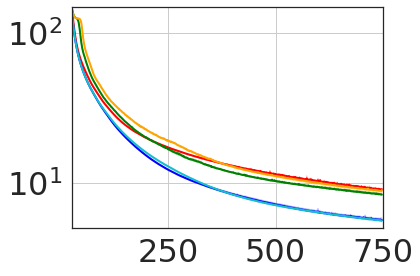

In [7]:
###############################################################
#### Figure 3 TIMIT Test Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'test_loss_timit_n158.pdf'

keys = ['run0','run1','run2','run3','run4']

stop_point=1.0

#srsgd
lstm = ['./result4plot_final/run-lstm-timit-seed-0_test_loss_lstm-tag-test_loss.json',
        './result4plot_final/run-lstm-timit-seed-1_test_loss_lstm-tag-test_loss.json',
        './result4plot_final/run-lstm-timit-seed-2_test_loss_lstm-tag-test_loss.json',
        './result4plot_final/run-lstm-timit-seed-3_test_loss_lstm-tag-test_loss.json',
        './result4plot_final/run-lstm-timit-seed-4_test_loss_lstm-tag-test_loss.json',]
id1 = 'LSTM'

mlstm = ['./result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-0_test_loss_mlstm-tag-test_loss.json',
      './result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-1_test_loss_mlstm-tag-test_loss.json',
      './result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-2_test_loss_mlstm-tag-test_loss.json',
      './result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-3_test_loss_mlstm-tag-test_loss.json',
      './result4plot_final/run-lstm-timit-mu-0.3-epsilon-0.1-seed-4_test_loss_mlstm-tag-test_loss.json',]
id2 = 'MomentumLSTM'

alstm = ['./result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-0_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-1_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-2_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-3_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-alstm-timit-mu-0.3-epsilon-0.1-mus-0.999-seed-4_test_loss_alstm-tag-test_loss.json',]
id3 = 'AdamLSTM'

rlstm = ['./result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-0_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-1_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-2_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-3_test_loss_alstm-tag-test_loss.json',
      './result4plot_final/run-rlstm-timit-mu-0.0-epsilon-0.1-mus-0.999-seed-4_test_loss_alstm-tag-test_loss.json',]
id4 = 'RMSPropLSTM'

nlstm = ['./result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-0_test_loss_nlstm-tag-test_loss.json',
      './result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-1_test_loss_nlstm-tag-test_loss.json',
      './result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-2_test_loss_nlstm-tag-test_loss.json',
      './result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-3_test_loss_nlstm-tag-test_loss.json',
      './result4plot_final/run-nlstm-timit-epsilon-0.1-rs-2-seed-4_test_loss_nlstm-tag-test_loss.json',]
id5 = 'SRLSTM'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(lstm, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mlstm, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)
sns_plot, _ = plot_line(alstm, keys, id3, stride=1, stop_point=stop_point, color='green', linewidth=2)
sns_plot, _ = plot_line(rlstm, keys, id4, stride=1, stop_point=stop_point, color='orange', linewidth=2)
sns_plot, _ = plot_line(nlstm, keys, id5, stride=1, stop_point=stop_point, color='tab:cyan', linewidth=2)


sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
sns_plot.set_xlim(left=25, right=750)
sns_plot.set_ylim(top=150, bottom=5)
# xticks = [2000, 4000, 6000, 8000, 10000, 12000, 14000]
# xticklabels = ['2K', '4K', '6K', '8K', '10K', '12K', '14K']
# plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


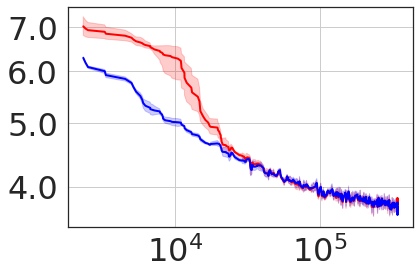

In [8]:
###############################################################
#### Figure 4 PTB Word Level Train Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_ptb_word.pdf'

keys = ['run0','run2','run3', 'run4', 'run5']
keys3 = ['run0','run2','run3', 'run5']
#srsgd
lstm = ['./result4plot_final/run-ptb-mylstm-seed-0_train_total_loss_LSTM-tag-train_total_loss.json',
        './result4plot_final/run-ptb-mylstm-seed-2_train_total_loss_LSTM-tag-train_total_loss.json',
        './result4plot_final/run-ptb-mylstm-seed-3_train_total_loss_LSTM-tag-train_total_loss.json',
       './result4plot_final/run-ptb-mylstm-seed-4_train_total_loss_LSTM-tag-train_total_loss.json',
       './result4plot_final/run-ptb-mylstm-seed-5_train_total_loss_LSTM-tag-train_total_loss.json',]
id1 = 'LSTM'

mlstm = ['./result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-0_train_total_loss_MLSTM-tag-train_total_loss.json',
      './result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-2_train_total_loss_MLSTM-tag-train_total_loss.json',
      './result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-3_train_total_loss_MLSTM-tag-train_total_loss.json',
        './result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-4_train_total_loss_MLSTM-tag-train_total_loss.json',
        './result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-5_train_total_loss_MLSTM-tag-train_total_loss.json',]
id2 = 'MomentumLSTM'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point, moving_avg=10))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

stop_point = 1.0
sns_plot, _ = plot_line(lstm, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mlstm, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)

sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(xscale="log",yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
# sns_plot.set_xlim(left=0)
# sns_plot.set_ylim(top=2.5, bottom=-0.01)
yticks = [4, 5, 6, 7]
yticklabels = ['4.0', '5.0', '6.0', '7.0']
plt.setp(sns_plot, yticks=yticks, yticklabels=yticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


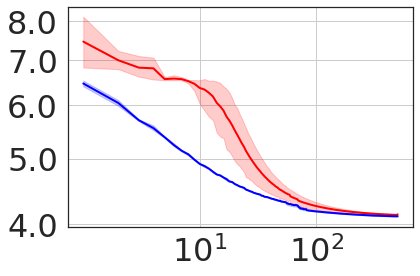

In [9]:
###############################################################
#### Figure 4 PTB Word Level Test Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'val_loss_ptb_word.pdf'

keys = ['run0','run2','run3', 'run4', 'run5']
#srsgd
lstm = ['./result4plot_final/run-ptb-mylstm-seed-0_val_loss_LSTM-tag-val_loss.json',
        './result4plot_final/run-ptb-mylstm-seed-2_val_loss_LSTM-tag-val_loss.json',
        './result4plot_final/run-ptb-mylstm-seed-3_val_loss_LSTM-tag-val_loss.json',
       './result4plot_final/run-ptb-mylstm-seed-4_val_loss_LSTM-tag-val_loss.json',
       './result4plot_final/run-ptb-mylstm-seed-5_val_loss_LSTM-tag-val_loss.json',]
id1 = 'LSTM'

mlstm = ['./result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-0_val_loss_MLSTM-tag-val_loss.json',
      './result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-2_val_loss_MLSTM-tag-val_loss.json',
      './result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-3_val_loss_MLSTM-tag-val_loss.json',
        './result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-4_val_loss_MLSTM-tag-val_loss.json',
        './result4plot_final/run-ptb-mlstm-mu-0.0-eps-0.6-seed-5_val_loss_MLSTM-tag-val_loss.json',]
id2 = 'MomentumLSTM'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

stop_point = 1.0
sns_plot, _ = plot_line(lstm, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mlstm, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)

sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(xscale="log",yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
# sns_plot.set_xlim(left=0)
# sns_plot.set_ylim(bottom=4.1)
yticks = [4e0, 5, 6e0, 7, 8e0]
yticklabels = ['4.0', '5.0', '6.0', '7.0', '8.0']
plt.setp(sns_plot, yticks=yticks, yticklabels=yticklabels)
xticks = [1e1, 1e2]
xticklabels = [r'$10^{1}$', r'$10^{2}$']
plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


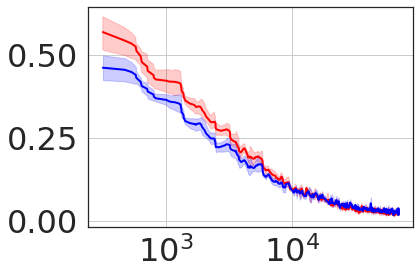

In [10]:
###############################################################
#### Figure 5 PMNIST Train Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_pmnist_dtriv_n512.pdf'

keys = ['run0','run1','run2','run3','run4']

stop_point=1.0

#srsgd
dtriv = ['./result4plot_final/run-dtriv-pmnist-gc-seed-0_train_loss_dtriv-tag-train_loss.json',
        './result4plot_final/run-dtriv-pmnist-gc-seed-1_train_loss_dtriv-tag-train_loss.json',
        './result4plot_final/run-dtriv-pmnist-gc-seed-2_train_loss_dtriv-tag-train_loss.json',
        './result4plot_final/run-dtriv-pmnist-gc-seed-3_train_loss_dtriv-tag-train_loss.json',
        './result4plot_final/run-dtriv-pmnist-gc-seed-4_train_loss_dtriv-tag-train_loss.json',]
id1 = 'DTRIV'

mdtriv = ['./result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-0_train_loss_mdtriv-tag-train_loss.json',
      './result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-1_train_loss_mdtriv-tag-train_loss.json',
      './result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-2_train_loss_mdtriv-tag-train_loss.json',
      './result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-3_train_loss_mdtriv-tag-train_loss.json',
      './result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-4_train_loss_mdtriv-tag-train_loss.json',]
id2 = 'MomentumDTRIV'


sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point, moving_avg=10))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(dtriv, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mdtriv, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)

sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(xscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
# sns_plot.set_xlim(left=0)
# sns_plot.set_ylim(top=2.5, bottom=-0.01)
# xticks = [2000, 4000, 6000, 8000, 10000, 12000, 14000]
# xticklabels = ['2K', '4K', '6K', '8K', '10K', '12K', '14K']
# plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


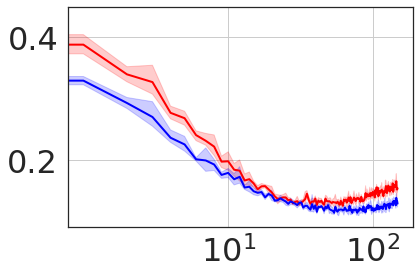

In [11]:
###############################################################
#### Figure 5 PMNIST Test Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'test_loss_pmnist_dtriv_n512.pdf'

keys = ['run0','run1','run2','run3','run4']

stop_point=1.0

#srsgd
dtriv = ['./result4plot_final/run-dtriv-pmnist-gc-seed-0_test_loss_dtriv-tag-test_loss.json',
        './result4plot_final/run-dtriv-pmnist-gc-seed-1_test_loss_dtriv-tag-test_loss.json',
        './result4plot_final/run-dtriv-pmnist-gc-seed-2_test_loss_dtriv-tag-test_loss.json',
        './result4plot_final/run-dtriv-pmnist-gc-seed-3_test_loss_dtriv-tag-test_loss.json',
        './result4plot_final/run-dtriv-pmnist-gc-seed-4_test_loss_dtriv-tag-test_loss.json',]
id1 = 'DTRIV'

mdtriv = ['./result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-0_test_loss_mdtriv-tag-test_loss.json',
      './result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-1_test_loss_mdtriv-tag-test_loss.json',
      './result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-2_test_loss_mdtriv-tag-test_loss.json',
      './result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-3_test_loss_mdtriv-tag-test_loss.json',
      './result4plot_final/run-mdtriv-pmnist-gc-mu-0.3-epsilon-0.3-seed-4_test_loss_mdtriv-tag-test_loss.json',]
id2 = 'MomentumDTRIV'


sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(dtriv, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mdtriv, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)

sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(xscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
# sns_plot.set_xlim(left=0)
sns_plot.set_ylim(top=0.45)
xticks = [1e1, 1e2]
xticklabels = [r'$10^{1}$', r'$10^{2}$']
plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
# xticks = [2000, 4000, 6000, 8000, 10000, 12000, 14000]
# xticklabels = ['2K', '4K', '6K', '8K', '10K', '12K', '14K']
# plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


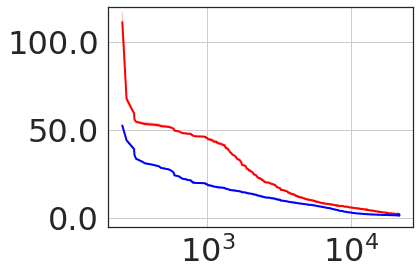

In [12]:
###############################################################
#### Figure 5 TIMIT Train Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_timit_dtriv_n322.pdf'

keys = ['run0','run1','run2','run3','run4']

stop_point=1.0

#srsgd
dtriv = ['./result4plot_final/run-dtriv-timit-seed-0_train_loss_dtriv-tag-train_loss.json',
        './result4plot_final/run-dtriv-timit-seed-1_train_loss_dtriv-tag-train_loss.json',
        './result4plot_final/run-dtriv-timit-seed-2_train_loss_dtriv-tag-train_loss.json',
        './result4plot_final/run-dtriv-timit-seed-3_train_loss_dtriv-tag-train_loss.json',
        './result4plot_final/run-dtriv-timit-seed-4_train_loss_dtriv-tag-train_loss.json',]
id1 = 'DTRIV'

mdtriv = ['./result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-0_train_loss_mdtriv-tag-train_loss.json',
      './result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-1_train_loss_mdtriv-tag-train_loss.json',
      './result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-2_train_loss_mdtriv-tag-train_loss.json',
      './result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-3_train_loss_mdtriv-tag-train_loss.json',
      './result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-4_train_loss_mdtriv-tag-train_loss.json',]
id2 = 'MomentumDTRIV'


sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point, moving_avg=10))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(dtriv, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mdtriv, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)

sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(xscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
# sns_plot.set_xlim(left=0)
sns_plot.set_ylim(top=120, bottom=-5)
# xticks = [2000, 4000, 6000, 8000, 10000, 12000, 14000]
# xticklabels = ['2K', '4K', '6K', '8K', '10K', '12K', '14K']
# plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
yticks = [0, 50, 100]
yticklabels = ['0.0', '50.0', '100.0']
plt.setp(sns_plot, yticks=yticks, yticklabels=yticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


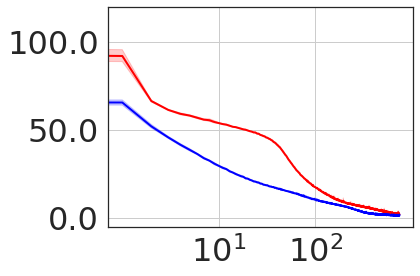

In [13]:
###############################################################
#### Figure 5 TIMIT Test Loss #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'test_loss_timit_dtriv_n322.pdf'

keys = ['run0','run1','run2','run3','run4']

stop_point=1.0

#srsgd
dtriv = ['./result4plot_final/run-dtriv-timit-seed-0_test_loss_dtriv-tag-test_loss.json',
        './result4plot_final/run-dtriv-timit-seed-1_test_loss_dtriv-tag-test_loss.json',
        './result4plot_final/run-dtriv-timit-seed-2_test_loss_dtriv-tag-test_loss.json',
        './result4plot_final/run-dtriv-timit-seed-3_test_loss_dtriv-tag-test_loss.json',
        './result4plot_final/run-dtriv-timit-seed-4_test_loss_dtriv-tag-test_loss.json',]
id1 = 'DTRIV'

mdtriv = ['./result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-0_test_loss_mdtriv-tag-test_loss.json',
      './result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-1_test_loss_mdtriv-tag-test_loss.json',
      './result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-2_test_loss_mdtriv-tag-test_loss.json',
      './result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-3_test_loss_mdtriv-tag-test_loss.json',
      './result4plot_final/run-mdtriv-timit-mu-0.3-epsilon-0.1-seed-4_test_loss_mdtriv-tag-test_loss.json',]
id2 = 'MomentumDTRIV'


sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=1.0, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = len(df[-1]['value'])
        df_min.append(df[-1]['value'])
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(dtriv, keys, id1, stride=1, stop_point=stop_point, color='red', linewidth=2)
sns_plot, _ = plot_line(mdtriv, keys, id2, stride=1, stop_point=stop_point, color='blue', linewidth=2)

sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(xscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=32)
sns_plot.tick_params(axis='both', which='minor', labelsize=32)
# sns_plot.set_xlim(left=0)
sns_plot.set_ylim(top=120, bottom=-5)
# xticks = [2000, 4000, 6000, 8000, 10000, 12000, 14000]
# xticklabels = ['2K', '4K', '6K', '8K', '10K', '12K', '14K']
# plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
yticks = [0, 50, 100]
yticklabels = ['0.0', '50.0', '100.0']
plt.setp(sns_plot, yticks=yticks, yticklabels=yticklabels)
xticks = [1e1, 1e2]
xticklabels = [r'$10^{1}$', r'$10^{2}$']
plt.setp(sns_plot, xticks=xticks, xticklabels=xticklabels)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

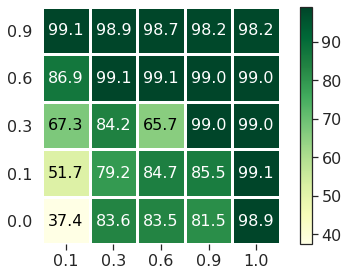

In [14]:
###############################################################
#### Figure 6 MNIST (Left) #####
###############################################################

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    plt.setp(cbar.ax.get_yticklabels(),fontsize=16)
    # cbar.ax.set_ylabel(cbarlabel, fontsize=16)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor", fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation_mode="anchor", fontsize=16)

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'ablation_mu_stepsize_mnist.pdf'
mu = ["0.9", "0.6", "0.3", "0.1", "0.0"]
stepsize = ["0.1", "0.3", "0.6", "0.9", "1.0"]

acc = np.array([[99.08, 98.90, 98.68, 98.22, 98.24],
                    [86.88, 99.08, 99.08, 99.00, 99.03],
                    [67.30, 84.17, 65.73, 99.03, 99.03],
                    [51.67, 79.25, 84.74, 85.50, 99.07],
                   [37.39, 83.58, 83.49, 81.54, 98.90]])

fig, ax = plt.subplots()

im, cbar = heatmap(acc, mu, stepsize, ax=ax,
                   cmap="YlGn", cbarlabel="accuracy")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=16)

fig.tight_layout()
fig.savefig(os.path.join(save_dir, save_name))

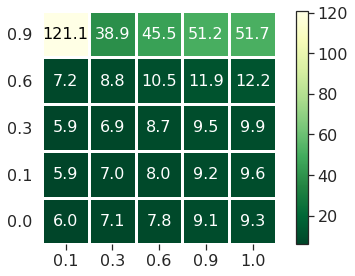

In [15]:
###############################################################
#### Figure 6 TIMIT (Middle) #####
###############################################################

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    plt.setp(cbar.ax.get_yticklabels(),fontsize=16)
    # cbar.ax.set_ylabel(cbarlabel, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor", fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation_mode="anchor", fontsize=16)

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["white", "black"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'ablation_mu_stepsize_timit.pdf'
mu = ["0.9", "0.6", "0.3", "0.1", "0.0"]
stepsize = ["0.1", "0.3", "0.6", "0.9", "1.0"]

acc = np.array([[121.07, 38.92, 45.47, 51.19, 51.66],
                    [7.24, 8.84, 10.46, 11.89, 12.25],
                    [5.87, 6.89, 8.73, 9.53, 9.86],
                    [5.86, 7.05, 8.01, 9.22, 9.61],
                    [6.00, 7.10, 7.85, 9.05, 9.33]])

fig, ax = plt.subplots()

im, cbar = heatmap(acc, mu, stepsize, ax=ax,
                   cmap="YlGn_r", cbarlabel="accuracy")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=16)

fig.tight_layout()
fig.savefig(os.path.join(save_dir, save_name))

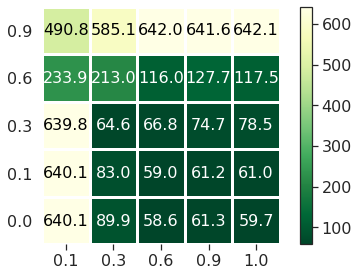

In [16]:
###############################################################
#### Figure 6 Penn TreeBank (Right) #####
###############################################################

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    plt.setp(cbar.ax.get_yticklabels(),fontsize=16)
    # cbar.ax.set_ylabel(cbarlabel, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor", fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation_mode="anchor", fontsize=16)

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["white", "black"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'ablation_mu_stepsize_ptb.pdf'
mu = ["0.9", "0.6", "0.3", "0.1", "0.0"]
stepsize = ["0.1", "0.3", "0.6", "0.9", "1.0"]

acc = np.array([[490.78, 585.13, 642.02, 641.60, 642.07],
                    [233.88, 212.99, 115.95, 127.74, 117.48],
                    [639.81, 64.60, 66.78, 74.74, 78.54],
                    [640.09, 82.96, 58.98, 61.16, 61.05],
                    [640.14, 89.88, 58.62, 61.30, 59.71]])

fig, ax = plt.subplots()

im, cbar = heatmap(acc, mu, stepsize, ax=ax,
                   cmap="YlGn_r", cbarlabel="accuracy")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=16)

fig.tight_layout()
fig.savefig(os.path.join(save_dir, save_name))